In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
flat_price = pd.read_csv('/content/flat_price_dataset.csv')

flat_price.head(10)

,Location,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Price_Category
0,Countryside,1730.0,4.0,3.0,No,3.0,24.0,No,Few,19.2,Low,High
1,City Center,2092.0,1.0,2.0,No,16.0,36.0,No,Many,2.6,Low,High
2,Countryside,NaN,3.0,1.0,Yes,8.0,47.0,No,Many,NaN,Medium,Medium
3,NaN,1945.0,3.0,2.0,Yes,18.0,42.0,Yes,Few,28.8,Low,High
4,City Center,1505.0,4.0,3.0,No,4.0,37.0,No,Many,2.8,Low,High
5,City Center,2154.0,1.0,3.0,Yes,5.0,40.0,Yes,Many,16.2,High,High
6,Countryside,866.0,2.0,NaN,No,2.0,44.0,Yes,Few,9.4,High,High
7,Suburbs,NaN,3.0,2.0,No,NaN,23.0,No,Few,12.1,High,Medium
8,Countryside,2234.0,4.0,2.0,Yes,19.0,NaN,Yes,NaN,5.8,NaN,High
9,Countryside,1632.0,1.0,1.0,NaN,NaN,NaN,No,Many,17.6,NaN,High


### Initial EDA

In [ ]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(flat_price.shape,flat_price.shape[0],flat_price.shape[1]))


Shape of the dataset is (1200, 12). This dataset contains 1200 rows and 12 columns.


In [ ]:
flat_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   1060 non-null   object 
 1   Size_sqft                  1094 non-null   float64
 2   Num_Bedrooms               1064 non-null   float64
 3   Num_Bathrooms              1057 non-null   float64
 4   Has_Balcony                1079 non-null   object 
 5   Floor_Number               1068 non-null   float64
 6   Building_Age_Years         1073 non-null   float64
 7   Parking_Available          1099 non-null   object 
 8   Nearby_Schools             1076 non-null   object 
 9   Distance_to_CityCenter_km  1097 non-null   float64
 10  Security_Level             1074 non-null   object 
 11  Price_Category             1200 non-null   object 
dtypes: float64(6), object(6)
memory usage: 112.6+ KB


In [ ]:
##Selecting numerical features
numerical_data = flat_price.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 6 numerical features: 

['Size_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Floor_Number', 'Building_Age_Years', 'Distance_to_CityCenter_km']


In [ ]:
#Selecting categoricalfeatures
categorical_data=flat_price.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 6 categorical features: 

['Location', 'Has_Balcony', 'Parking_Available', 'Nearby_Schools', 'Security_Level', 'Price_Category']


In [ ]:
# Transposed stats for numerical features

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Size_sqft,1094.0,1379.874771,639.971957,301.0,821.25,1343.0,1930.25,2499.0
Num_Bedrooms,1064.0,2.514098,1.129352,1.0,1.00,3.0,4.00,4.0
Num_Bathrooms,1057.0,1.970672,0.826921,1.0,1.00,2.0,3.00,3.0
Floor_Number,1068.0,9.764045,5.774629,0.0,5.00,10.0,15.00,19.0
Building_Age_Years,1073.0,23.829450,14.241186,0.0,12.00,23.0,36.00,49.0
Distance_to_CityCenter_km,1097.0,14.807475,8.368203,0.5,7.60,14.7,21.60,30.0


In [ ]:
# Transposed stats for categorical features

categorical_data.describe().T

,count,unique,top,freq
Location,1060,3,City Center,369
Has_Balcony,1079,2,No,549
Parking_Available,1099,2,No,558
Nearby_Schools,1076,2,Few,542
Security_Level,1074,3,High,367
Price_Category,1200,3,Medium,413


In [ ]:
numerical_data.var()

,0
Size_sqft,409564.105987
Num_Bedrooms,1.275436
Num_Bathrooms,0.683798
Floor_Number,33.346335
Building_Age_Years,202.811371
Distance_to_CityCenter_km,70.026824


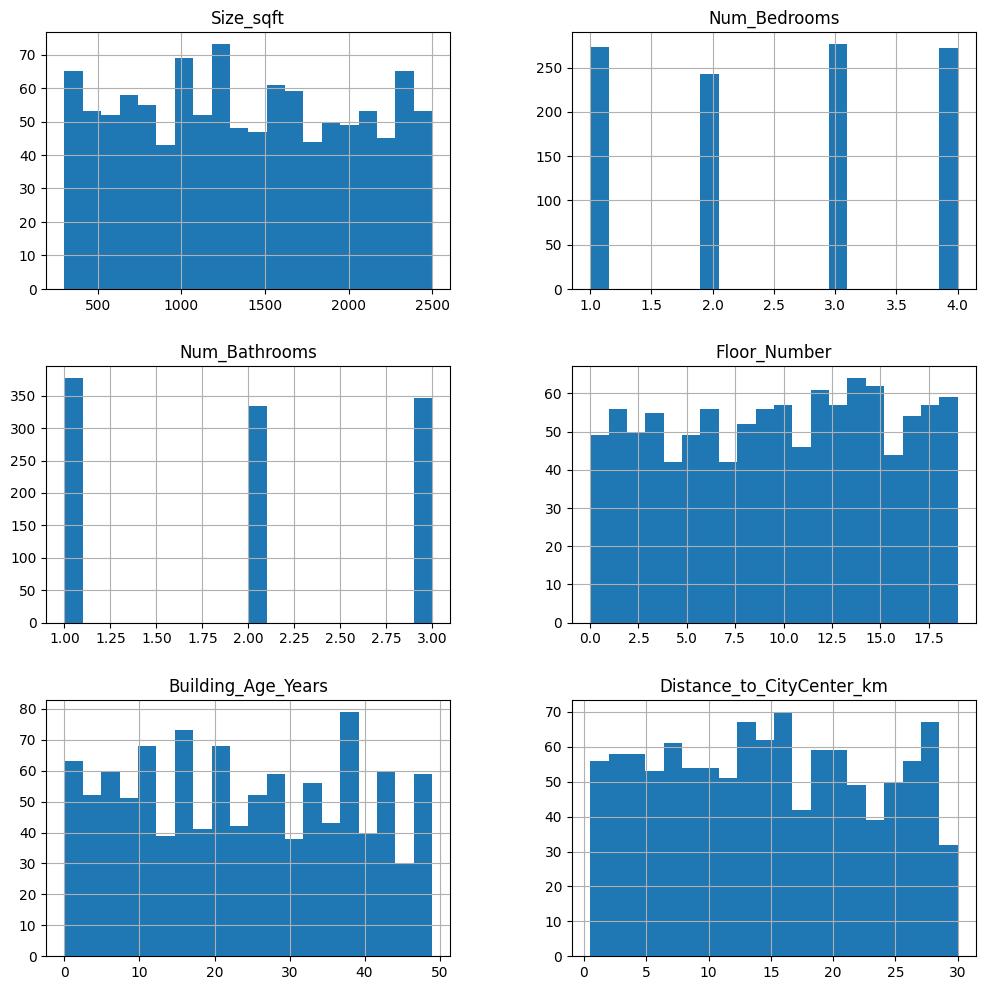

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

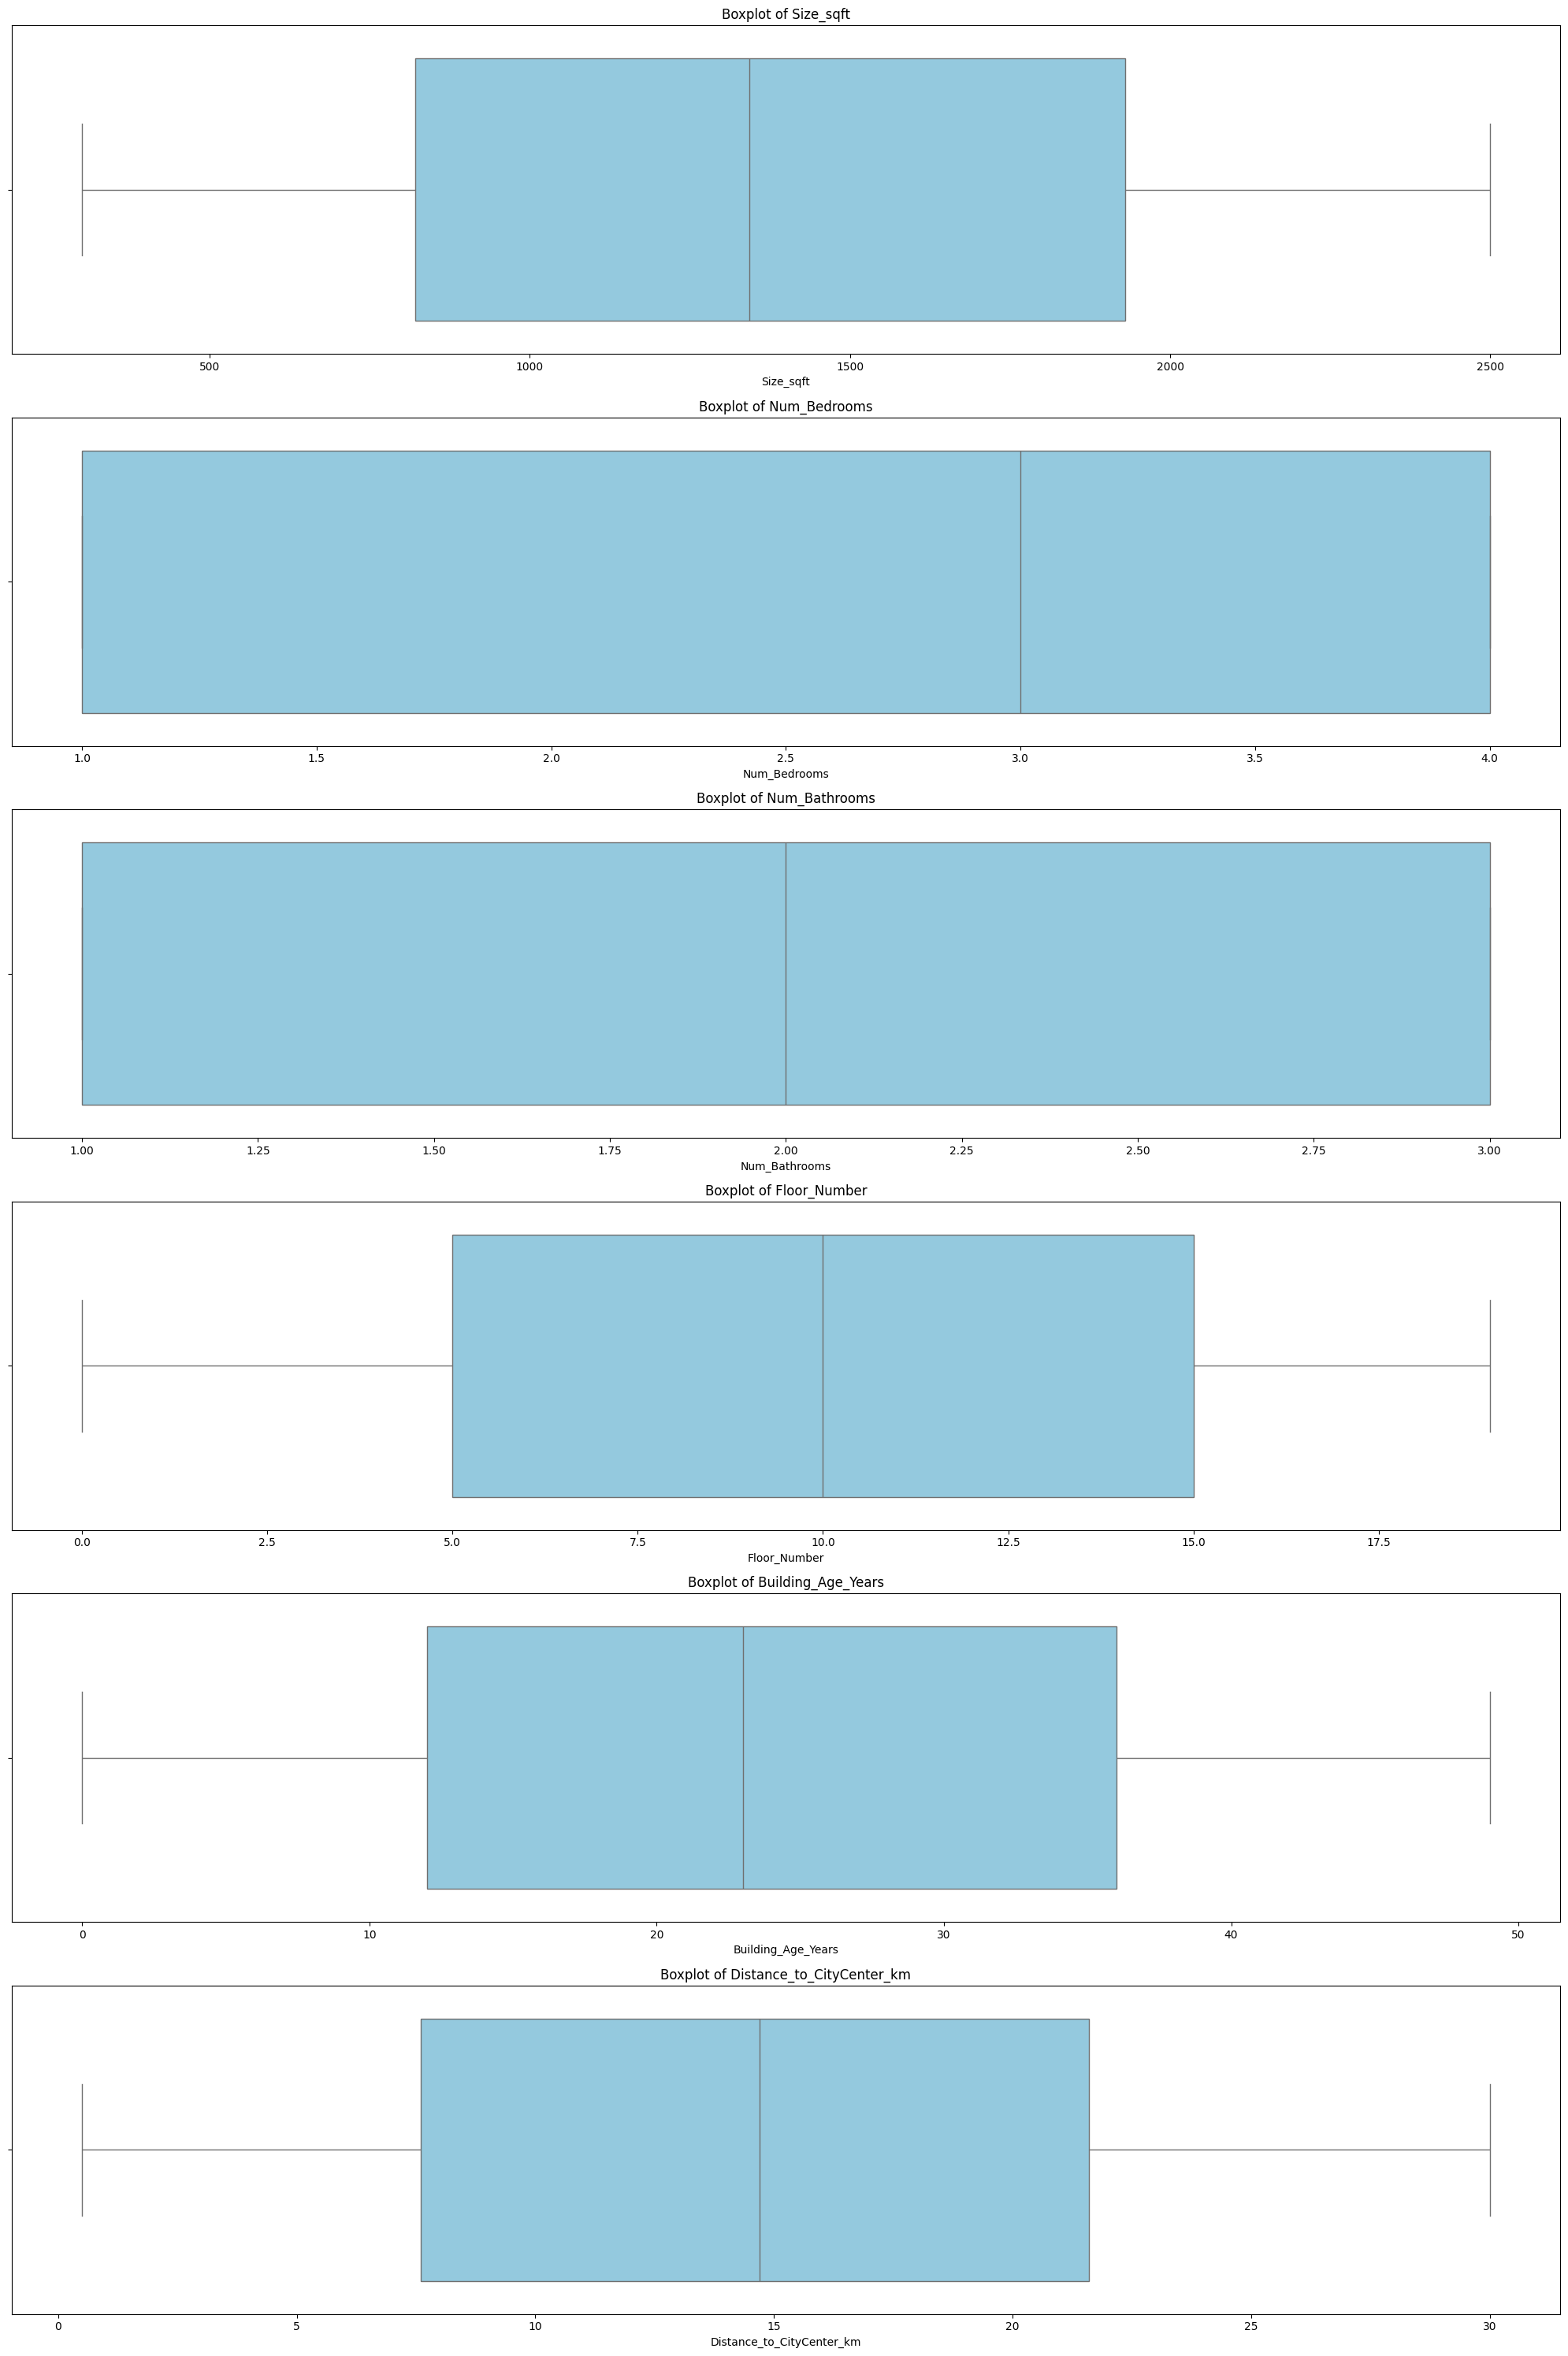

In [ ]:
# Select only numerical columns for boxplot analysis
numeric_cols = flat_price.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=flat_price[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
# Number of Unique values in each feature
numerical_data.nunique()

,0
Size_sqft,841
Num_Bedrooms,4
Num_Bathrooms,3
Floor_Number,20
Building_Age_Years,50
Distance_to_CityCenter_km,291


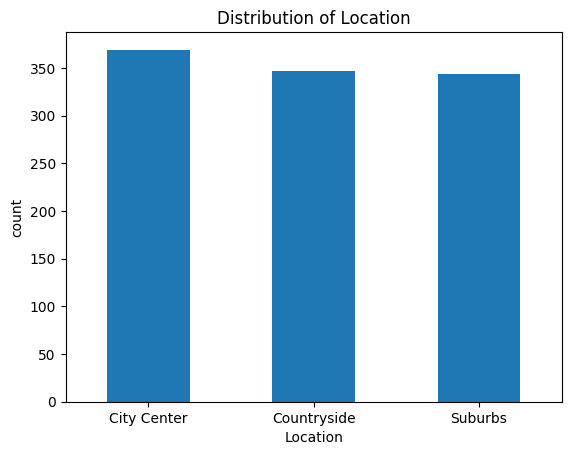

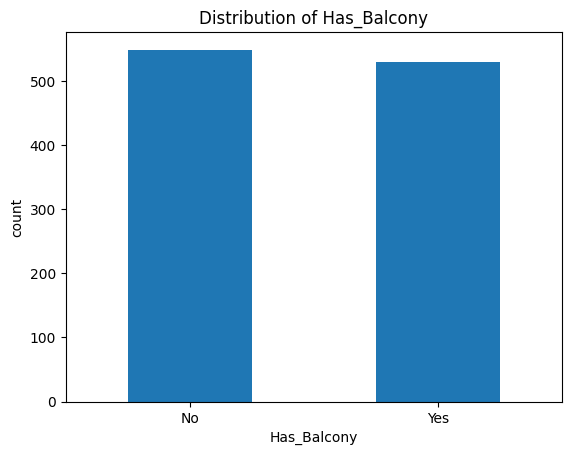

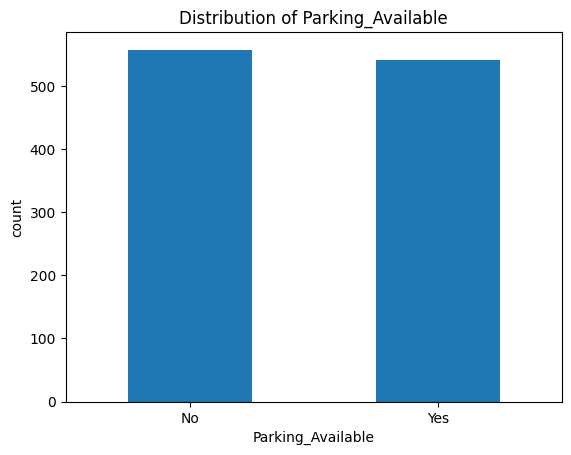

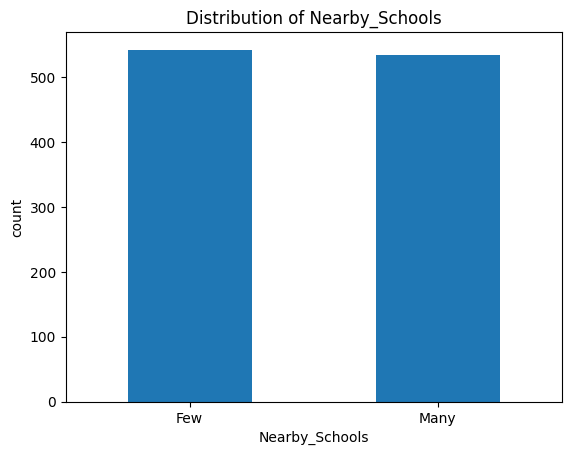

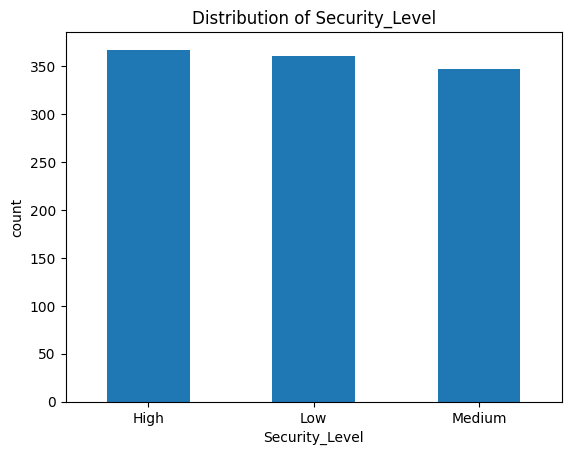

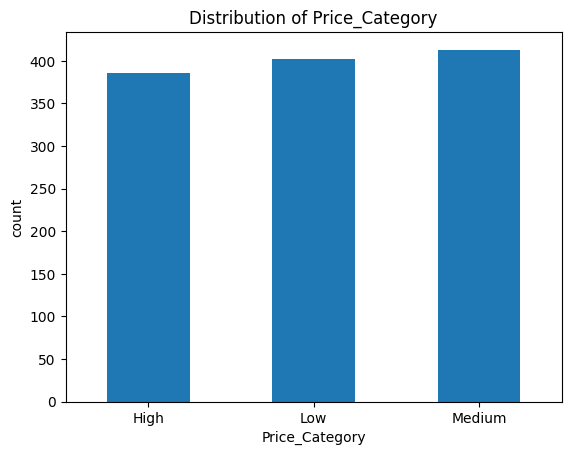

In [ ]:
# Barplot of unique value counts in every categorical features
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,Size_sqft,Num_Bedrooms,Num_Bathrooms,Floor_Number,Building_Age_Years,Distance_to_CityCenter_km
Size_sqft,1.000000,0.012727,0.022786,0.017399,-0.037013,0.033256
Num_Bedrooms,0.012727,1.000000,-0.044169,0.029356,0.052383,-0.035343
Num_Bathrooms,0.022786,-0.044169,1.000000,0.002315,0.029806,0.011478
Floor_Number,0.017399,0.029356,0.002315,1.000000,0.032759,0.007869
Building_Age_Years,-0.037013,0.052383,0.029806,0.032759,1.000000,0.004747
Distance_to_CityCenter_km,0.033256,-0.035343,0.011478,0.007869,0.004747,1.000000


Correlation Matrix:
                           Size_sqft  Num_Bedrooms  Num_Bathrooms  \
Size_sqft                   1.000000      0.012727       0.022786   
Num_Bedrooms                0.012727      1.000000      -0.044169   
Num_Bathrooms               0.022786     -0.044169       1.000000   
Floor_Number                0.017399      0.029356       0.002315   
Building_Age_Years         -0.037013      0.052383       0.029806   
Distance_to_CityCenter_km   0.033256     -0.035343       0.011478   

                           Floor_Number  Building_Age_Years  \
Size_sqft                      0.017399           -0.037013   
Num_Bedrooms                   0.029356            0.052383   
Num_Bathrooms                  0.002315            0.029806   
Floor_Number                   1.000000            0.032759   
Building_Age_Years             0.032759            1.000000   
Distance_to_CityCenter_km      0.007869            0.004747   

                           Distance_to_CityCenter_km  

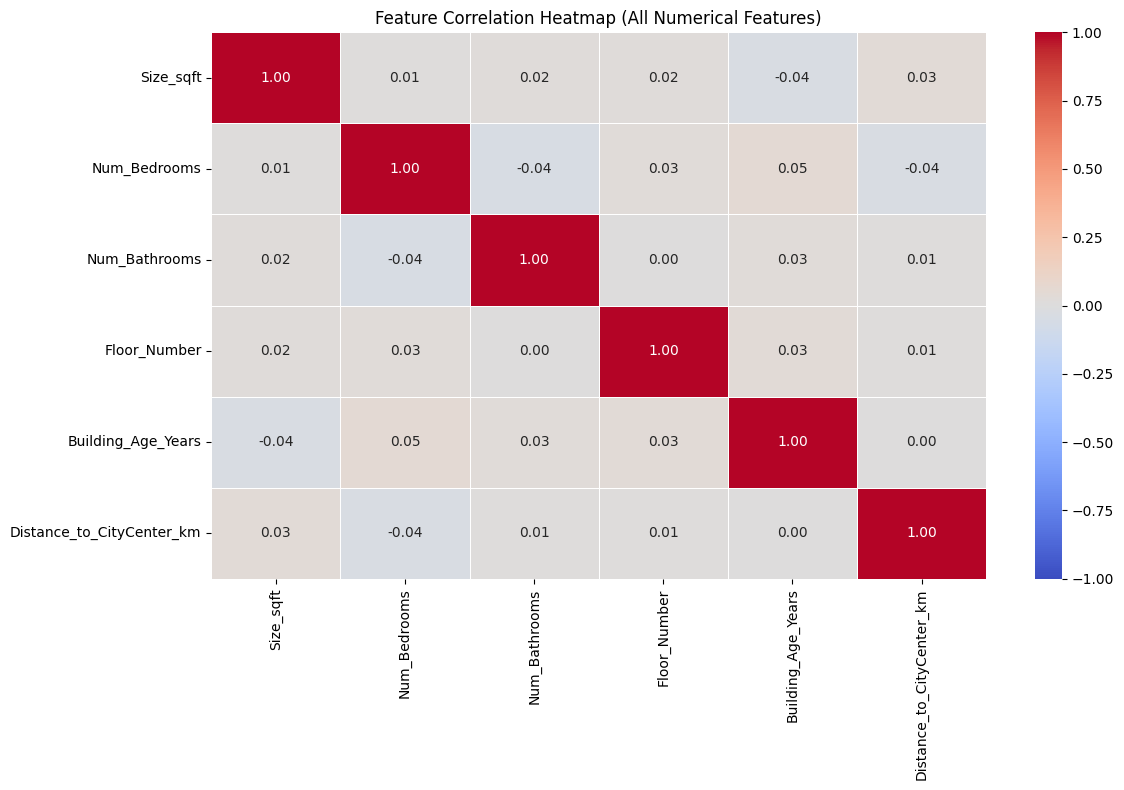

In [ ]:
# Compute correlation matrix of all numerical features
correlation_matrix = flat_price.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt='.2f',
            linewidths=0.5)
plt.title('Feature Correlation Heatmap (All Numerical Features)')
plt.tight_layout()
plt.show()


<ipython-input-16-04c65a53486e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


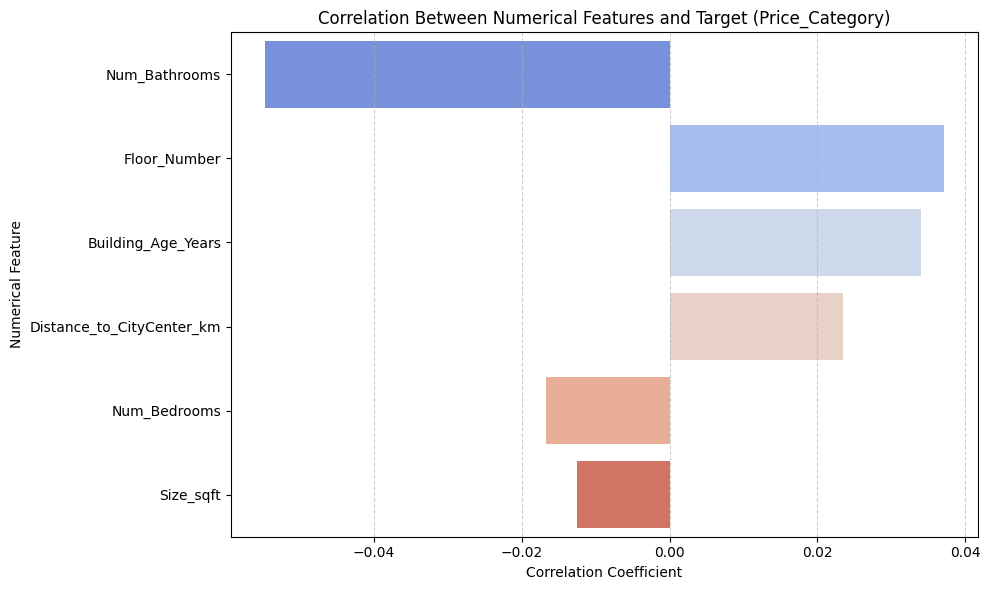

In [ ]:
# Correlation plot between numerical features and target

# Ensure target is numeric
if flat_price['Price_Category'].dtype == 'object':
    flat_price['Price_Category'] = flat_price['Price_Category'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Select only numeric features (excluding the target)
numeric_features = flat_price.select_dtypes(include=['float64', 'int64']).drop(columns='Price_Category')

# Compute correlation with the target
correlations = numeric_features.corrwith(flat_price['Price_Category'])

# Sort for better visualization
correlations = correlations.sort_values(key=abs, ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation Between Numerical Features and Target (Price_Category)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numerical Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Class Distribution:
 Price_Category
0    402
1    413
2    385
Name: count, dtype: int64

Class Percentage:
 Price_Category
0    33.50
1    34.42
2    32.08
Name: proportion, dtype: float64


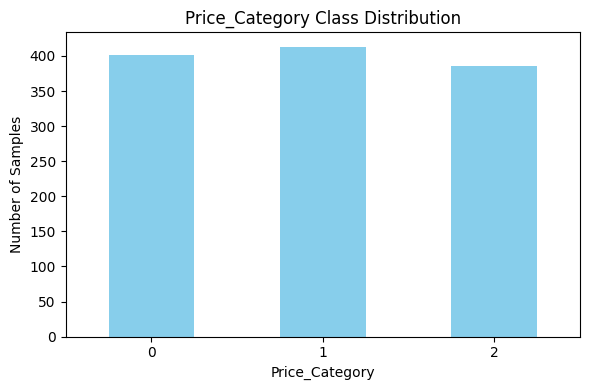

In [ ]:
# Check Imbalance in data

# Count of each class
class_counts = flat_price['Price_Category'].value_counts().sort_index()
print("Class Distribution:\n", class_counts)

# Relative frequency (percentage)
class_percent = flat_price['Price_Category'].value_counts(normalize=True).sort_index() * 100
print("\nClass Percentage:\n", class_percent.round(2))

# Bar plot of class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Price_Category Class Distribution')
plt.xlabel('Price_Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

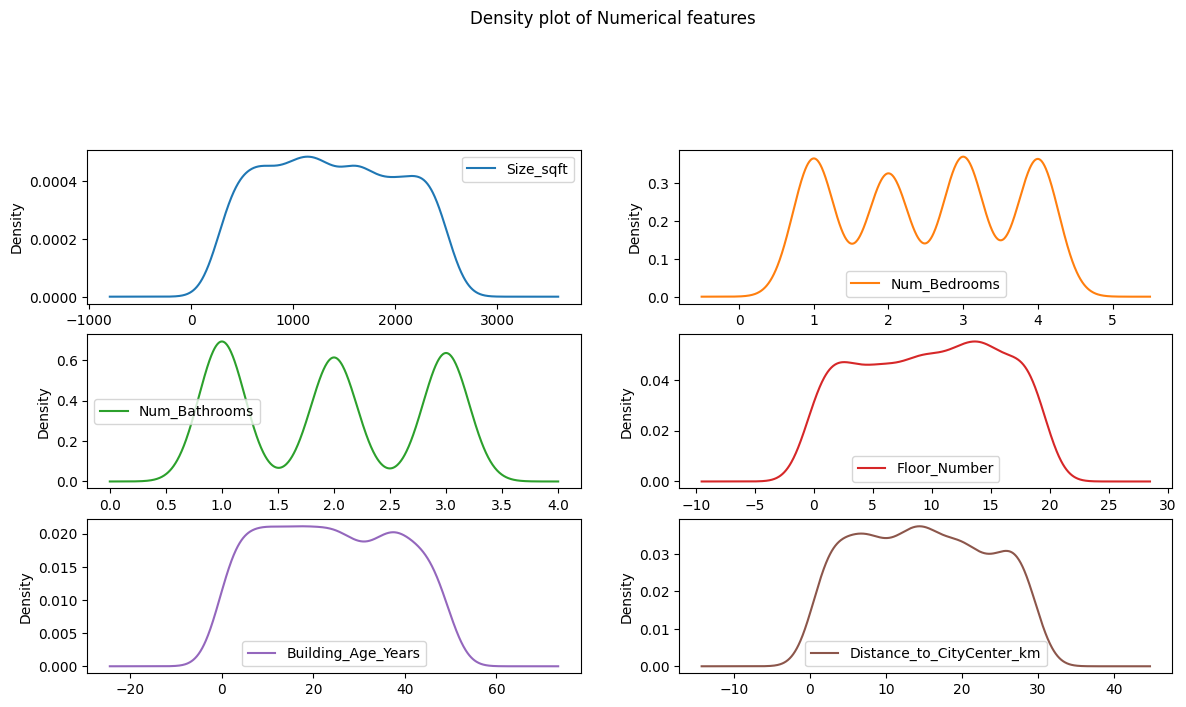

In [ ]:
# Density plots of numerical features

numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

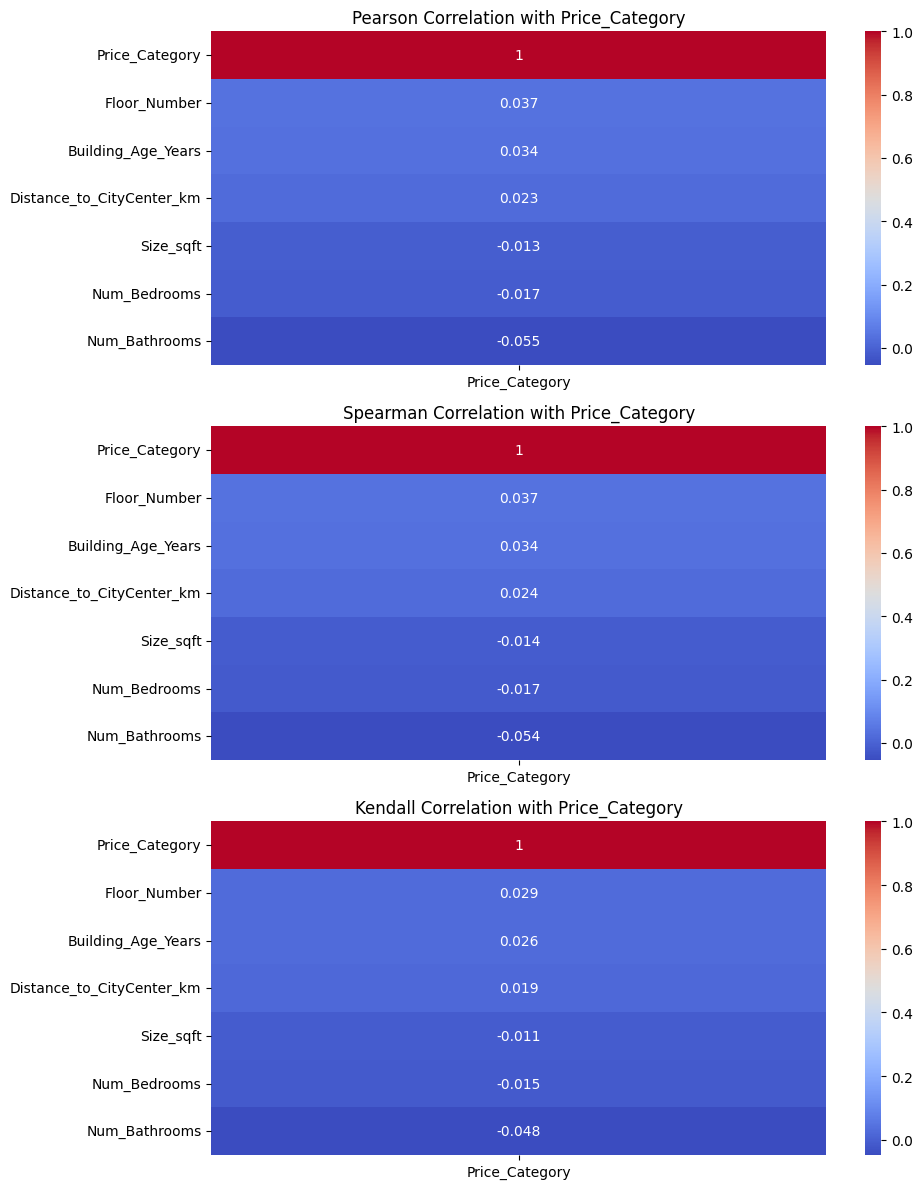

In [ ]:
# Correlation plot between numerical features and target

# Use the fully numeric DataFrame
numerical_data = flat_price.select_dtypes(include=['int64', 'float64'])

# Compute correlations with the target 'Price_Category' using different methods
corr1 = numerical_data.corr(method='pearson')[['Price_Category']].sort_values(by='Price_Category', ascending=False)
corr2 = numerical_data.corr(method='spearman')[['Price_Category']].sort_values(by='Price_Category', ascending=False)
corr3 = numerical_data.corr(method='kendall')[['Price_Category']].sort_values(by='Price_Category', ascending=False)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Set titles
ax[0].set_title('Pearson Correlation with Price_Category', fontsize=12)
ax[1].set_title('Spearman Correlation with Price_Category', fontsize=12)
ax[2].set_title('Kendall Correlation with Price_Category', fontsize=12)

# Draw heatmaps
sns.heatmap(corr1, annot=True, cmap='coolwarm', ax=ax[0])
sns.heatmap(corr2, annot=True, cmap='coolwarm', ax=ax[1])
sns.heatmap(corr3, annot=True, cmap='coolwarm', ax=ax[2])

plt.tight_layout()
plt.show()


# Preprocessing

In [ ]:
flat_price.isnull().sum()

,0
Location,140
Size_sqft,106
Num_Bedrooms,136
Num_Bathrooms,143
Has_Balcony,121
Floor_Number,132
Building_Age_Years,127
Parking_Available,101
Nearby_Schools,124
Distance_to_CityCenter_km,103


### 1. Basic observations, 2. DEALING WITH NULL VALUES IN SECURITY AND LOCATION


In [ ]:
print(flat_price['Location'].unique())
print(flat_price['Nearby_Schools'].unique())
print(flat_price['Security_Level'].unique())
print(flat_price['Price_Category'].unique())

['Countryside' 'City Center' nan 'Suburbs']
['Few' 'Many' nan]
['Low' 'Medium' 'High' nan]
[2 1 0]


In [ ]:
print(flat_price['Location'].value_counts(dropna=False))
print(flat_price['Nearby_Schools'].value_counts(dropna=False))
print(flat_price['Security_Level'].value_counts(dropna=False))
print(flat_price['Price_Category'].value_counts(dropna=False))

Location
City Center    369
Countryside    347
Suburbs        344
NaN            140
Name: count, dtype: int64
Nearby_Schools
Few     542
Many    534
NaN     124
Name: count, dtype: int64
Security_Level
High      367
Low       360
Medium    347
NaN       126
Name: count, dtype: int64
Price_Category
1    413
0    402
2    385
Name: count, dtype: int64


In [ ]:
flat_price.shape

(1200, 12)

In [ ]:
security_to_location = {
    'High' : 'City Center',
    'Medium' : 'Suburbs',
    'Low' : 'Countryside'
}

location_to_security = {
    'City Center' : 'High',
    'Suburbs' : 'Medium',
    'Countryside' : 'Low'
}

flat_price['Location'] = flat_price['Location'].fillna(
    flat_price['Security_Level'].map(security_to_location)
)

flat_price['Security_Level'] = flat_price['Security_Level'].fillna(
    flat_price['Location'].map(location_to_security)
)

# flat_price.isnull().sum()

schools_to_location = {
    'Many' : 'City Center',
    'Few' : 'Suburbs',
    None: 'Countryside'
}

flat_price['Location'] = flat_price['Location'].fillna(
    flat_price['Nearby_Schools'].map(schools_to_location)
)


flat_price['Security_Level'] = flat_price['Security_Level'].fillna(
    flat_price['Location'].map(location_to_security)
)


location_to_school = {
    'City Center' : 'Many',
    'Suburbs' : 'Few',
}

flat_price['Nearby_Schools'] = flat_price['Nearby_Schools'].fillna(
    flat_price['Location'].map(location_to_school)
)



flat_price.isnull().sum()



,0
Location,3
Size_sqft,106
Num_Bedrooms,136
Num_Bathrooms,143
Has_Balcony,121
Floor_Number,132
Building_Age_Years,127
Parking_Available,101
Nearby_Schools,52
Distance_to_CityCenter_km,103


In [ ]:
nan_counts = flat_price[flat_price['Nearby_Schools'].isna()].groupby('Location').size()
print(nan_counts)

Location
Countryside    49
dtype: int64


In [ ]:
countryside_counts = flat_price[flat_price['Location'] == 'Countryside']['Nearby_Schools'].value_counts(dropna=False)
print(countryside_counts)

countryside_counts = flat_price[flat_price['Location'] == 'City Center']['Nearby_Schools'].value_counts(dropna=False)
print(countryside_counts)

countryside_counts = flat_price[flat_price['Location'] == 'Suburbs']['Nearby_Schools'].value_counts(dropna=False)
print(countryside_counts)

Nearby_Schools
Many    173
Few     159
NaN      49
Name: count, dtype: int64
Nearby_Schools
Many    232
Few     181
Name: count, dtype: int64
Nearby_Schools
Few     237
Many    166
Name: count, dtype: int64


### Parking_Available

In [ ]:
# Count Parking Available for Countryside
countryside_parking = flat_price[flat_price['Location'] == 'Countryside']['Parking_Available'].value_counts(dropna=False)
print("Countryside Parking Availability:")
print(countryside_parking)
print()

# Count Parking Available for City Center
citycenter_parking = flat_price[flat_price['Location'] == 'City Center']['Parking_Available'].value_counts(dropna=False)
print("City Center Parking Availability:")
print(citycenter_parking)
print()

# Count Parking Available for Suburbs
suburbs_parking = flat_price[flat_price['Location'] == 'Suburbs']['Parking_Available'].value_counts(dropna=False)
print("Suburbs Parking Availability:")
print(suburbs_parking)

Countryside Parking Availability:
Parking_Available
Yes    182
No     175
NaN     24
Name: count, dtype: int64

City Center Parking Availability:
Parking_Available
No     207
Yes    165
NaN     41
Name: count, dtype: int64

Suburbs Parking Availability:
Parking_Available
Yes    193
No     175
NaN     35
Name: count, dtype: int64


In [ ]:
flat_price.loc[lambda x: x['Location'].eq('Countryside') & x['Parking_Available'].isna(), 'Parking_Available'] = \
    np.random.choice(['No', 'Yes'], size=(flat_price['Location'].eq('Countryside') & flat_price['Parking_Available'].isna()).sum(), p=[0.8, 0.2])

In [ ]:
flat_price.loc[lambda x: x['Location'].eq('City Center') & x['Parking_Available'].isna(), 'Parking_Available'] = \
    np.random.choice(['No', 'Yes'], size=(flat_price['Location'].eq('City Center') & flat_price['Parking_Available'].isna()).sum(), p=[0.1, 0.9])

In [ ]:
flat_price.loc[lambda x: x['Location'].eq('Suburbs') & x['Parking_Available'].isna(), 'Parking_Available'] = \
    np.random.choice(['No', 'Yes'], size=(flat_price['Location'].eq('Suburbs') & flat_price['Parking_Available'].isna()).sum(), p=[0.7, 0.3])

In [ ]:
# Count Parking Available for Countryside
countryside_parking = flat_price[flat_price['Location'] == 'Countryside']['Parking_Available'].value_counts(dropna=False)
print("Countryside Parking Availability:")
print(countryside_parking)
print()

# Count Parking Available for City Center
citycenter_parking = flat_price[flat_price['Location'] == 'City Center']['Parking_Available'].value_counts(dropna=False)
print("City Center Parking Availability:")
print(citycenter_parking)
print()

# Count Parking Available for Suburbs
suburbs_parking = flat_price[flat_price['Location'] == 'Suburbs']['Parking_Available'].value_counts(dropna=False)
print("Suburbs Parking Availability:")
print(suburbs_parking)

Countryside Parking Availability:
Parking_Available
No     196
Yes    185
Name: count, dtype: int64

City Center Parking Availability:
Parking_Available
No     213
Yes    200
Name: count, dtype: int64

Suburbs Parking Availability:
Parking_Available
Yes    208
No     195
Name: count, dtype: int64


In [ ]:
flat_price.head(10)

,Location,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Price_Category
0,Countryside,1730.0,4.0,3.0,No,3.0,24.0,No,Few,19.2,Low,2
1,City Center,2092.0,1.0,2.0,No,16.0,36.0,No,Many,2.6,Low,2
2,Countryside,NaN,3.0,1.0,Yes,8.0,47.0,No,Many,NaN,Medium,1
3,Countryside,1945.0,3.0,2.0,Yes,18.0,42.0,Yes,Few,28.8,Low,2
4,City Center,1505.0,4.0,3.0,No,4.0,37.0,No,Many,2.8,Low,2
5,City Center,2154.0,1.0,3.0,Yes,5.0,40.0,Yes,Many,16.2,High,2
6,Countryside,866.0,2.0,NaN,No,2.0,44.0,Yes,Few,9.4,High,2
7,Suburbs,NaN,3.0,2.0,No,NaN,23.0,No,Few,12.1,High,1
8,Countryside,2234.0,4.0,2.0,Yes,19.0,NaN,Yes,NaN,5.8,Low,2
9,Countryside,1632.0,1.0,1.0,NaN,NaN,NaN,No,Many,17.6,Low,2


### Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


flat_price = flat_price.dropna(subset=['Security_Level'])
flat_price.isnull().sum()


flat_price['Has_Balcony'] = flat_price['Has_Balcony'].map({'Yes': 1, 'No': 0})
flat_price['Parking_Available'] = flat_price['Parking_Available'].map({'Yes': 1, 'No': 0})
flat_price['Nearby_Schools'] = flat_price['Nearby_Schools'].map({'Many': 1, 'Few': 0})
# flat_price['Price_Category'] = flat_price['Price_Category'].map({'Low': 0, 'Medium': 1, 'High': 2})

flat_price = pd.get_dummies(flat_price, columns=['Location'])

categories = [['Low', 'Medium', 'High']]
encoder = OrdinalEncoder(categories=categories)

flat_price['Security_Level'] = encoder.fit_transform(flat_price[['Security_Level']])


flat_price['Location_City Center'] = flat_price['Location_City Center'].astype(bool).astype(int)
flat_price['Location_Countryside'] = flat_price['Location_Countryside'].astype(bool).astype(int)
flat_price['Location_Suburbs'] = flat_price['Location_Suburbs'].astype(bool).astype(int)

<ipython-input-33-33524fec224e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_price['Has_Balcony'] = flat_price['Has_Balcony'].map({'Yes': 1, 'No': 0})
<ipython-input-33-33524fec224e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_price['Parking_Available'] = flat_price['Parking_Available'].map({'Yes': 1, 'No': 0})
<ipython-input-33-33524fec224e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
flat_price.head(10)

,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Price_Category,Location_City Center,Location_Countryside,Location_Suburbs
0,1730.0,4.0,3.0,0.0,3.0,24.0,0,0.0,19.2,0.0,2,0,1,0
1,2092.0,1.0,2.0,0.0,16.0,36.0,0,1.0,2.6,0.0,2,1,0,0
2,NaN,3.0,1.0,1.0,8.0,47.0,0,1.0,NaN,1.0,1,0,1,0
3,1945.0,3.0,2.0,1.0,18.0,42.0,1,0.0,28.8,0.0,2,0,1,0
4,1505.0,4.0,3.0,0.0,4.0,37.0,0,1.0,2.8,0.0,2,1,0,0
5,2154.0,1.0,3.0,1.0,5.0,40.0,1,1.0,16.2,2.0,2,1,0,0
6,866.0,2.0,NaN,0.0,2.0,44.0,1,0.0,9.4,2.0,2,0,1,0
7,NaN,3.0,2.0,0.0,NaN,23.0,0,0.0,12.1,2.0,1,0,0,1
8,2234.0,4.0,2.0,1.0,19.0,NaN,1,NaN,5.8,0.0,2,0,1,0
9,1632.0,1.0,1.0,NaN,NaN,NaN,0,1.0,17.6,0.0,2,0,1,0


In [ ]:
flat_price.isnull().sum()


,0
Size_sqft,106
Num_Bedrooms,136
Num_Bathrooms,143
Has_Balcony,121
Floor_Number,132
Building_Age_Years,127
Parking_Available,0
Nearby_Schools,49
Distance_to_CityCenter_km,102
Security_Level,0


### Size_sqft NaN

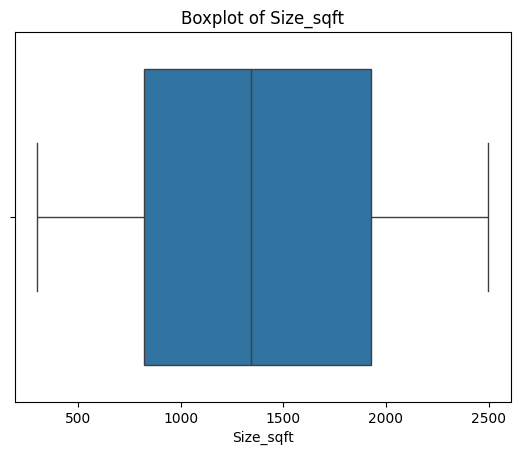

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=flat_price['Size_sqft'])
plt.title("Boxplot of Size_sqft")
plt.show()


In [ ]:
#no outliers so using mean for imputation
mean_size = flat_price['Size_sqft'].mean()
flat_price['Size_sqft'] = flat_price['Size_sqft'].fillna(mean_size)

### Num_Bedrooms NaN

In [ ]:
print(flat_price['Num_Bedrooms'].value_counts(dropna=False).sort_index())


Num_Bedrooms
1.0    272
2.0    242
3.0    276
4.0    271
NaN    136
Name: count, dtype: int64


In [ ]:
#most of the flats have 3 bedrooms (mode = 3)
# flat_price['Num_Bedrooms'] = flat_price['Num_Bedrooms'].fillna(3.0)

In [ ]:
#almost evenly distributed. will do a 25/25/27/23 split here.

import numpy as np

# Get NaN indices and shuffle them
na_idx = flat_price.index[flat_price['Num_Bedrooms'].isna()]
na_idx_shuffled = np.random.permutation(na_idx)

# Calculate counts for each category (25%, 25%, 27%, 23%)
n = len(na_idx)
n1 = int(0.25 * n)  # 25% → 1.0
n2 = int(0.25 * n)  # 25% → 2.0
n3 = int(0.27 * n)  # 27% → 3.0
n4 = n - n1 - n2 - n3  # Remaining 23% → 4.0

# Assign values randomly but in exact proportions
flat_price.loc[na_idx_shuffled[:n1], 'Num_Bedrooms'] = 1.0
flat_price.loc[na_idx_shuffled[n1:n1+n2], 'Num_Bedrooms'] = 2.0
flat_price.loc[na_idx_shuffled[n1+n2:n1+n2+n3], 'Num_Bedrooms'] = 3.0
flat_price.loc[na_idx_shuffled[n1+n2+n3:], 'Num_Bedrooms'] = 4.0

### Num_Bathrooms NaN

In [ ]:
print(flat_price['Num_Bathrooms'].value_counts(dropna=False).sort_index())


Num_Bathrooms
1.0    374
2.0    334
3.0    346
NaN    143
Name: count, dtype: int64


In [ ]:
#almost evenly distributed. will do a 40/35/25 split here.

na_idx = np.random.permutation(flat_price.index[flat_price['Num_Bathrooms'].isna()])
n = len(na_idx)
flat_price.loc[na_idx, 'Num_Bathrooms'] = [1.0] * int(0.4 * n) + [3.0] * int(0.35 * n) + [2.0] * (n - int(0.4 * n) - int(0.35 * n))

### Floor_Number and Building_Age_Years NaN


<Axes: xlabel='Floor_Number'>

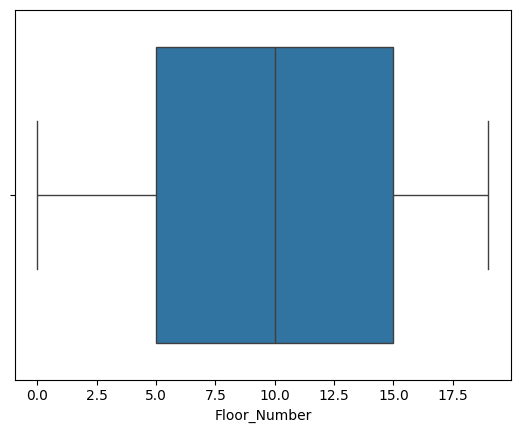

In [ ]:
import seaborn as sns
sns.boxplot(x=flat_price['Floor_Number'])
# sns.boxplot(x=flat_price['Building_Age_Years'])


In [ ]:
from sklearn.impute import SimpleImputer

floor_imputer = SimpleImputer(strategy='median')
age_imputer = SimpleImputer(strategy='median')


flat_price['Floor_Number'] = floor_imputer.fit_transform(flat_price[['Floor_Number']])
flat_price['Building_Age_Years'] = age_imputer.fit_transform(flat_price[['Building_Age_Years']])



### Distance_to_CityCenter_km

In [ ]:
x = flat_price['Distance_to_CityCenter_km'].skew()
print(x)

0.061541949091862544


In [ ]:
mean_distance = flat_price['Distance_to_CityCenter_km'].mean()
flat_price['Distance_to_CityCenter_km'].fillna(mean_distance, inplace=True)

<ipython-input-46-d563bbbed324>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flat_price['Distance_to_CityCenter_km'].fillna(mean_distance, inplace=True)


### Nearby_Schools

In [ ]:
flat_price['Nearby_Schools'].value_counts()

,count
Nearby_Schools,
0.0,577
1.0,571


In [ ]:
#randomly assign few and many (50-50 distribution)

import numpy as np

missing_indices = flat_price[flat_price['Nearby_Schools'].isna()].index

num_missing = len(missing_indices)

half = num_missing // 2
other_half = num_missing - half
values_to_fill = np.array([0.0]*half + [1.0]*other_half)
np.random.shuffle(values_to_fill)
flat_price.loc[missing_indices, 'Nearby_Schools'] = values_to_fill

### Has_Balcony NaN

In [ ]:
#depends on many factors. size of the flat, location, number of rooms etc. this is we'll be using Predictive imputation (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Drop rows where 'Has_Balcony' is NaN
train_data = flat_price.dropna(subset=['Has_Balcony'])

# Features (exclude the target 'Has_Balcony' and 'NaN' rows)
X = train_data.drop(columns=['Has_Balcony'])

# Target (the 'Has_Balcony' column)
y = train_data['Has_Balcony']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer (replace NaN with mean)
imputer = SimpleImputer(strategy='mean') # or strategy='median' if you prefer
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model performance (optional)
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: 0.4722222222222222


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print(f"Model Accuracy: {model.score(X_test, y_test)}")


Model Accuracy: 0.4861111111111111


In [ ]:
#accuracy close to random -> so random fill better
import numpy as np
flat_price.loc[flat_price['Has_Balcony'].isna(), 'Has_Balcony'] = np.random.choice([0, 1], size=flat_price['Has_Balcony'].isna().sum())


### Corr check

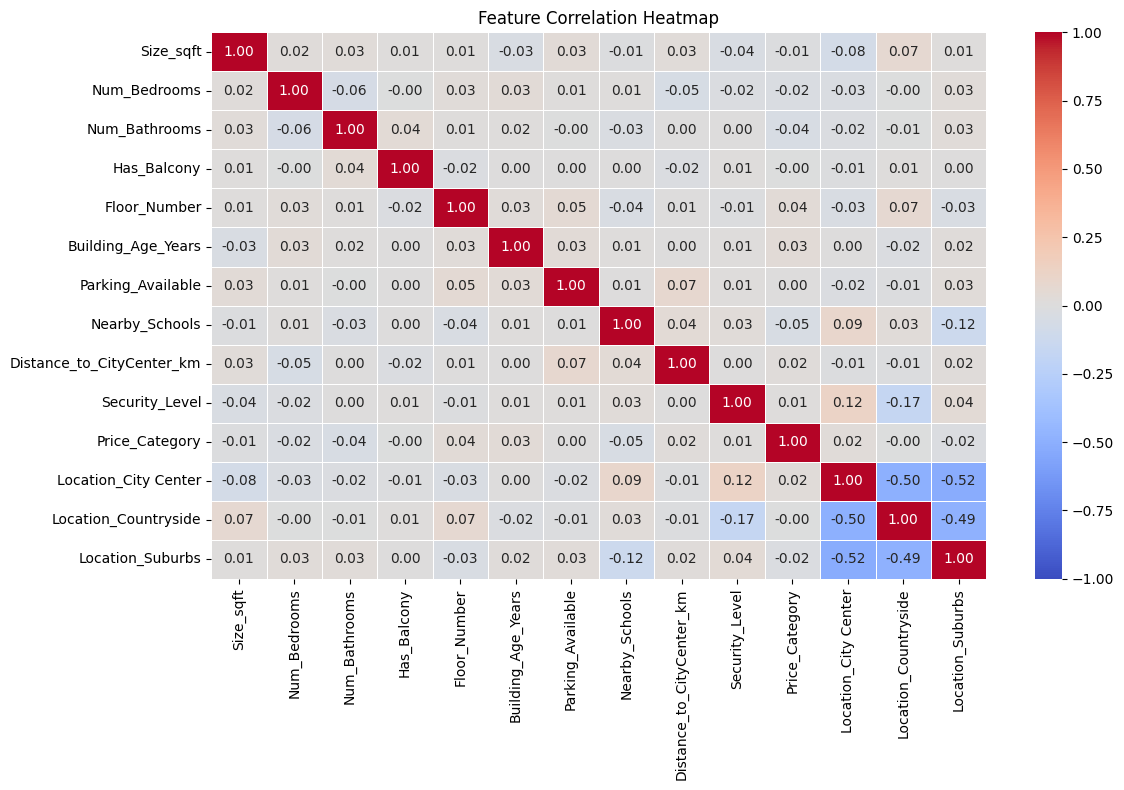

In [ ]:
corr = flat_price.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

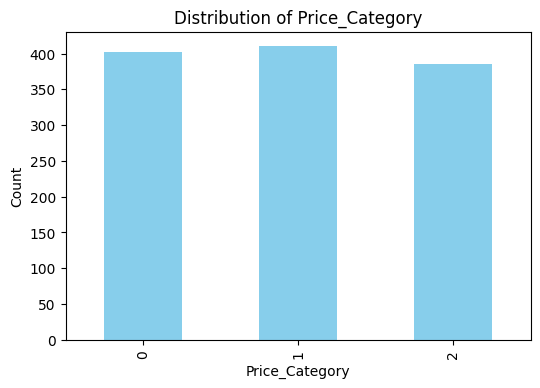

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot distribution of Price_Category
plt.figure(figsize=(6, 4))
flat_price['Price_Category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Price_Category')
plt.xlabel('Price_Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Select numerical columns
numerical_cols = ['Size_sqft', 'Num_Bedrooms', 'Distance_to_CityCenter_km', 'Building_Age_Years']

# Summary statistics
print(flat_price[numerical_cols].describe())

         Size_sqft  Num_Bedrooms  Distance_to_CityCenter_km  \
count  1197.000000   1197.000000                 1197.00000   
mean   1378.010082      2.511278                   14.80621   
std     610.689094      1.126267                    8.00954   
min     301.000000      1.000000                    0.50000   
25%     887.000000      1.000000                    8.20000   
50%    1378.010082      3.000000                   14.80621   
75%    1873.000000      4.000000                   20.90000   
max    2499.000000      4.000000                   30.00000   

       Building_Age_Years  
count         1197.000000  
mean            23.744361  
std             13.474483  
min              0.000000  
25%             13.000000  
50%             23.000000  
75%             35.000000  
max             49.000000  


In [ ]:
numerical_features = [
    'Size_sqft',
    'Num_Bedrooms',
    'Num_Bathrooms',
    'Floor_Number',
    'Building_Age_Years',
    'Distance_to_CityCenter_km'
]



In [ ]:
flat_price.head(10)

,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Price_Category,Location_City Center,Location_Countryside,Location_Suburbs
0,1730.000000,4.0,3.0,0.0,3.0,24.0,0,0.0,19.20000,0.0,2,0,1,0
1,2092.000000,1.0,2.0,0.0,16.0,36.0,0,1.0,2.60000,0.0,2,1,0,0
2,1378.010082,3.0,1.0,1.0,8.0,47.0,0,1.0,14.80621,1.0,1,0,1,0
3,1945.000000,3.0,2.0,1.0,18.0,42.0,1,0.0,28.80000,0.0,2,0,1,0
4,1505.000000,4.0,3.0,0.0,4.0,37.0,0,1.0,2.80000,0.0,2,1,0,0
5,2154.000000,1.0,3.0,1.0,5.0,40.0,1,1.0,16.20000,2.0,2,1,0,0
6,866.000000,2.0,2.0,0.0,2.0,44.0,1,0.0,9.40000,2.0,2,0,1,0
7,1378.010082,3.0,2.0,0.0,10.0,23.0,0,0.0,12.10000,2.0,1,0,0,1
8,2234.000000,4.0,2.0,1.0,19.0,23.0,1,1.0,5.80000,0.0,2,0,1,0
9,1632.000000,1.0,1.0,0.0,10.0,23.0,0,1.0,17.60000,0.0,2,0,1,0


In [ ]:
# ''' USING ONLY STANDARD SCALING'''
# from sklearn.preprocessing import StandardScaler

# numerical_features = [
#     'Size_sqft',
#     'Num_Bedrooms',
#     'Num_Bathrooms',
#     'Floor_Number',
#     'Building_Age_Years',
#     'Distance_to_CityCenter_km'
# ]


# scaler = StandardScaler()
# flat_price[numerical_features] = scaler.fit_transform(flat_price[numerical_features])

In [ ]:
''' USING MIXED SCALING'''

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Define feature groups
numerical_features = [
    'Size_sqft',
    'Num_Bedrooms',
    'Num_Bathrooms',
    'Floor_Number',
    'Building_Age_Years',
    'Distance_to_CityCenter_km'
]

binary_ordinal_features = [
    'Has_Balcony',           # Binary: 0/1
    'Parking_Available',     # Binary: 0/1
    'Nearby_Schools',        # Binary: 0/1
    'Security_Level'         # Ordinal: 0 = Low, 1 = Medium, 2 = High
]

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), numerical_features),
        ('minmax', MinMaxScaler(), binary_ordinal_features)
    ],
    remainder='passthrough'  # Keeps other columns (e.g. one-hot encoded location) unchanged
)

# Apply the transformations
flat_price_scaled = preprocessor.fit_transform(flat_price)

# Optional: Convert back to DataFrame with column names
scaled_columns = numerical_features + binary_ordinal_features + [
    col for col in flat_price.columns
    if col not in numerical_features + binary_ordinal_features
]
flat_price_scaled_df = pd.DataFrame(flat_price_scaled, columns=scaled_columns)


In [ ]:
flat_price.head(10)

,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Price_Category,Location_City Center,Location_Countryside,Location_Suburbs
0,1730.000000,4.0,3.0,0.0,3.0,24.0,0,0.0,19.20000,0.0,2,0,1,0
1,2092.000000,1.0,2.0,0.0,16.0,36.0,0,1.0,2.60000,0.0,2,1,0,0
2,1378.010082,3.0,1.0,1.0,8.0,47.0,0,1.0,14.80621,1.0,1,0,1,0
3,1945.000000,3.0,2.0,1.0,18.0,42.0,1,0.0,28.80000,0.0,2,0,1,0
4,1505.000000,4.0,3.0,0.0,4.0,37.0,0,1.0,2.80000,0.0,2,1,0,0
5,2154.000000,1.0,3.0,1.0,5.0,40.0,1,1.0,16.20000,2.0,2,1,0,0
6,866.000000,2.0,2.0,0.0,2.0,44.0,1,0.0,9.40000,2.0,2,0,1,0
7,1378.010082,3.0,2.0,0.0,10.0,23.0,0,0.0,12.10000,2.0,1,0,0,1
8,2234.000000,4.0,2.0,1.0,19.0,23.0,1,1.0,5.80000,0.0,2,0,1,0
9,1632.000000,1.0,1.0,0.0,10.0,23.0,0,1.0,17.60000,0.0,2,0,1,0


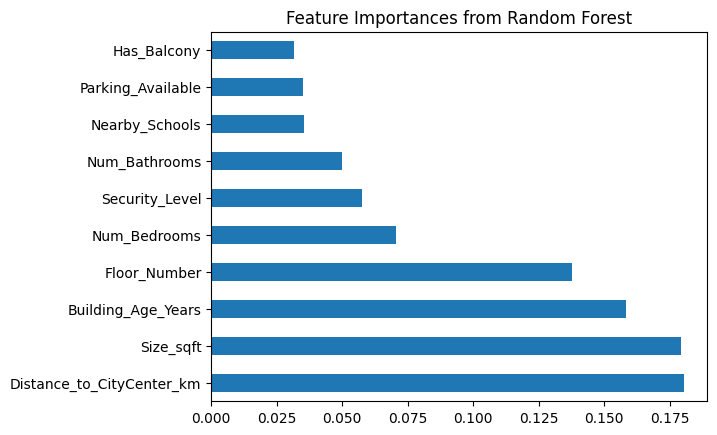

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'flat_price' is your DataFrame
X = flat_price.drop(columns=['Price_Category'])
y = flat_price['Price_Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.show()


In [ ]:
#Data Splitting (70:30 stratified split)

from sklearn.model_selection import train_test_split


# Perform a 70:30 split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,        # 30% test, 70% train
    random_state=42,      # for reproducibility
    stratify=y            # preserve class distribution
)


# Confirm split sizes
print("Training set size:", X_train.shape[0])
print("Test set size    :", X_test.shape[0])

# Check class distribution in both sets
print("\nClass distribution in original data:")
print(y.value_counts(normalize=True).round(3))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True).round(3))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True).round(3))

Training set size: 837
Test set size    : 360

Class distribution in original data:
Price_Category
1    0.343
0    0.336
2    0.322
Name: proportion, dtype: float64

Class distribution in training set:
Price_Category
1    0.343
0    0.336
2    0.321
Name: proportion, dtype: float64

Class distribution in test set:
Price_Category
1    0.342
0    0.336
2    0.322
Name: proportion, dtype: float64


# **Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    class_weight=class_weights_dict,
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict class labels
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3128 - loss: 88.5565 
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3304 - loss: 4.9465
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3206 - loss: 2.0095
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3437 - loss: 4.0701
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3365 - loss: 4.7813
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3032 - loss: 3.5618
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3489 - loss: 2.1253
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3416 - loss: 4.1829
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3115 - loss: 6.5831
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2964 - loss: 4.3894
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3556 - loss: 3.3330
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3340 - 

# **KNN**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Split features and target
X = flat_price.drop(columns=['Price_Category'])
y = flat_price['Price_Category']

# Stratified 70:30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Scale features (important for distance-based models like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this hyperparameter
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3388888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40       121
           1       0.38      0.40      0.39       123
           2       0.26      0.11      0.16       116

    accuracy                           0.34       360
   macro avg       0.32      0.34      0.31       360
weighted avg       0.32      0.34      0.32       360



# **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Features and target
X = flat_price.drop(columns=['Price_Category'])
y = flat_price['Price_Category']

# Stratified 70:30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Ensure all features are numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression (multinomial for 3 classes)
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.32222222222222224

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.38      0.37       121
           1       0.30      0.36      0.32       123
           2       0.32      0.22      0.26       116

    accuracy                           0.32       360
   macro avg       0.32      0.32      0.32       360
weighted avg       0.32      0.32      0.32       360



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Features and target
X = flat_price.drop(columns=['Price_Category'])
y = flat_price['Price_Category']

# Stratified 70:30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Ensure all features are numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# (Optional) Feature scaling - not required for Random Forest
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.33055555555555555

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.35      0.34       121
           1       0.33      0.36      0.34       123
           2       0.34      0.28      0.31       116

    accuracy                           0.33       360
   macro avg       0.33      0.33      0.33       360
weighted avg       0.33      0.33      0.33       360



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Features and target
X = flat_price.drop(columns=['Price_Category'])
y = flat_price['Price_Category']

# Stratified 70:30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Ensure all features are numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# (Optional) Scaling — not needed for Decision Trees, but harmless if used
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict
y_pred = dt_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.3527777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.31      0.33       121
           1       0.35      0.37      0.36       123
           2       0.35      0.39      0.37       116

    accuracy                           0.35       360
   macro avg       0.35      0.35      0.35       360
weighted avg       0.35      0.35      0.35       360



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


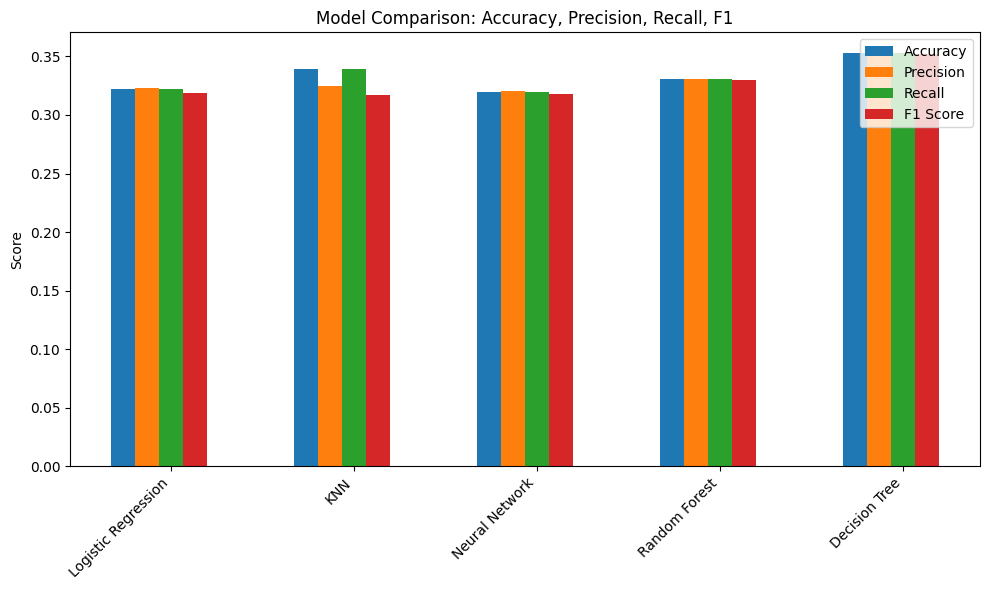

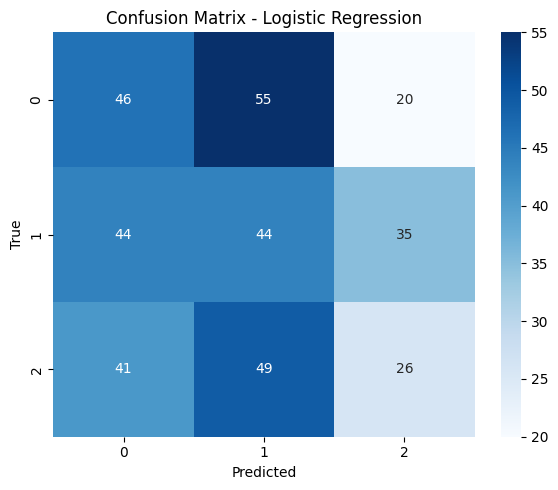

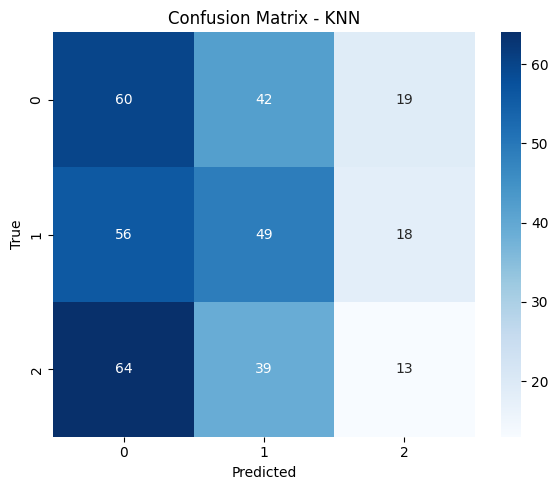

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


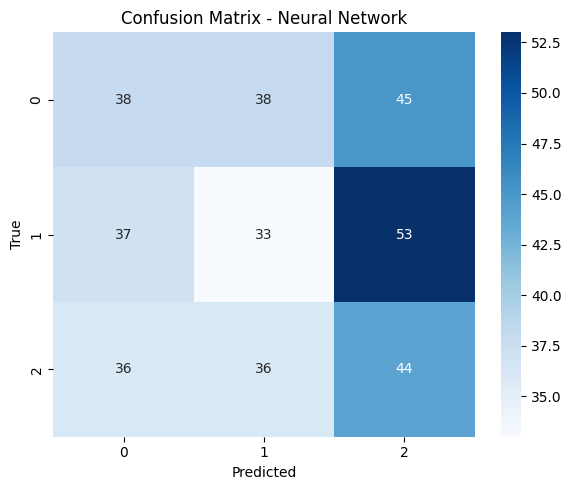

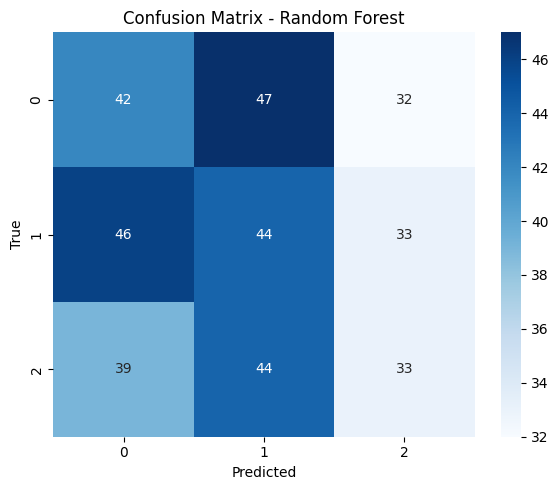

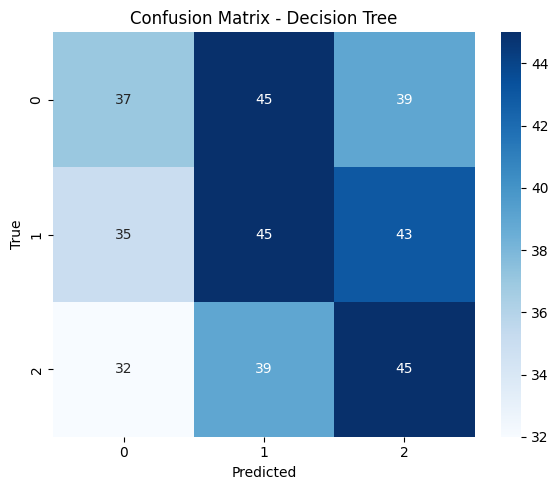

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


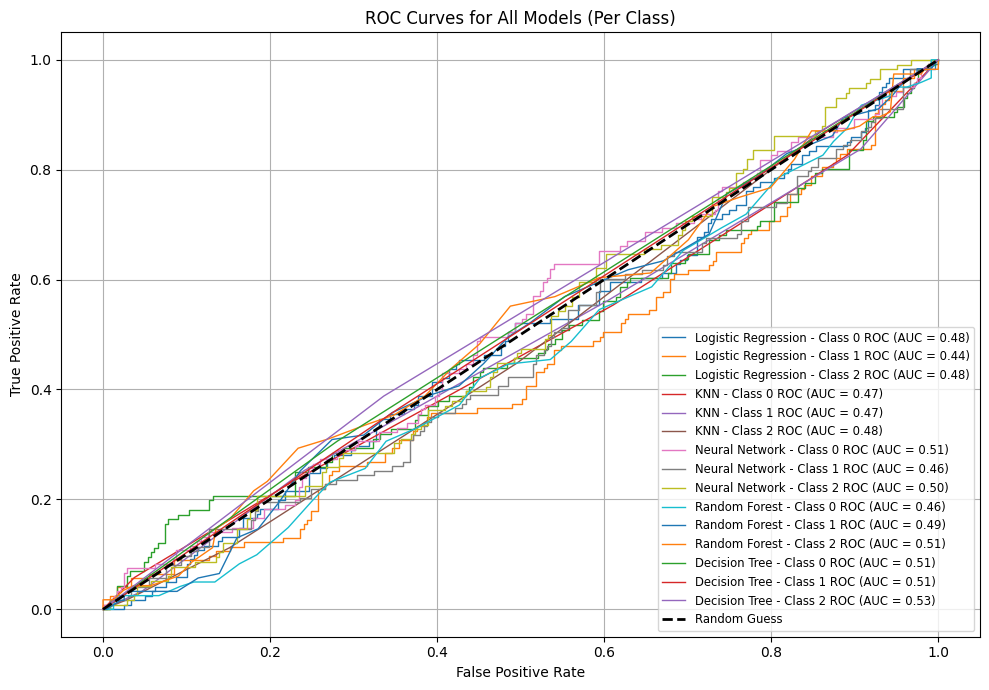

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Models and scaled test data
models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Neural Network': model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model
}

X_test_data = X_test_scaled  # All models used scaled features
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# 1. Accuracy, Precision, Recall, F1
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, mdl in models.items():
    if name == 'Neural Network':
        y_pred = np.argmax(mdl.predict(X_test_data), axis=1)
    else:
        y_pred = mdl.predict(X_test_data)

    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Plot bar charts
plt.figure(figsize=(10, 6))
for i, (metric, values) in enumerate(metrics.items()):
    plt.bar([x + i*0.13 for x in range(len(models))], values, width=0.13, label=metric)

plt.xticks([r + 0.26 for r in range(len(models))], models.keys(), rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Confusion Matrices
for name, mdl in models.items():
    if name == 'Neural Network':
        y_pred = np.argmax(mdl.predict(X_test_data), axis=1)
    else:
        y_pred = mdl.predict(X_test_data)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# 3. AUC Scores & ROC Curves
plt.figure(figsize=(10, 7))
for name, mdl in models.items():
    try:
        if name == 'Neural Network':
            y_score = mdl.predict(X_test_data)
        else:
            if hasattr(mdl, "predict_proba"):
                y_score = mdl.predict_proba(X_test_data)
            else:
                y_score = OneVsRestClassifier(mdl).fit(X_train_scaled, y_train).predict_proba(X_test_data)

        # AUC
        roc_auc = roc_auc_score(y_test_binarized, y_score, multi_class='ovr', average='macro')

        # Plot micro-average ROC curve
        fpr = dict()
        tpr = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
            plt.plot(fpr[i], tpr[i], lw=1, label=f'{name} - Class {i} ROC (AUC = {auc(fpr[i], tpr[i]):.2f})')

    except Exception as e:
        print(f"Skipped ROC for {name}: {e}")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.title('ROC Curves for All Models (Per Class)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


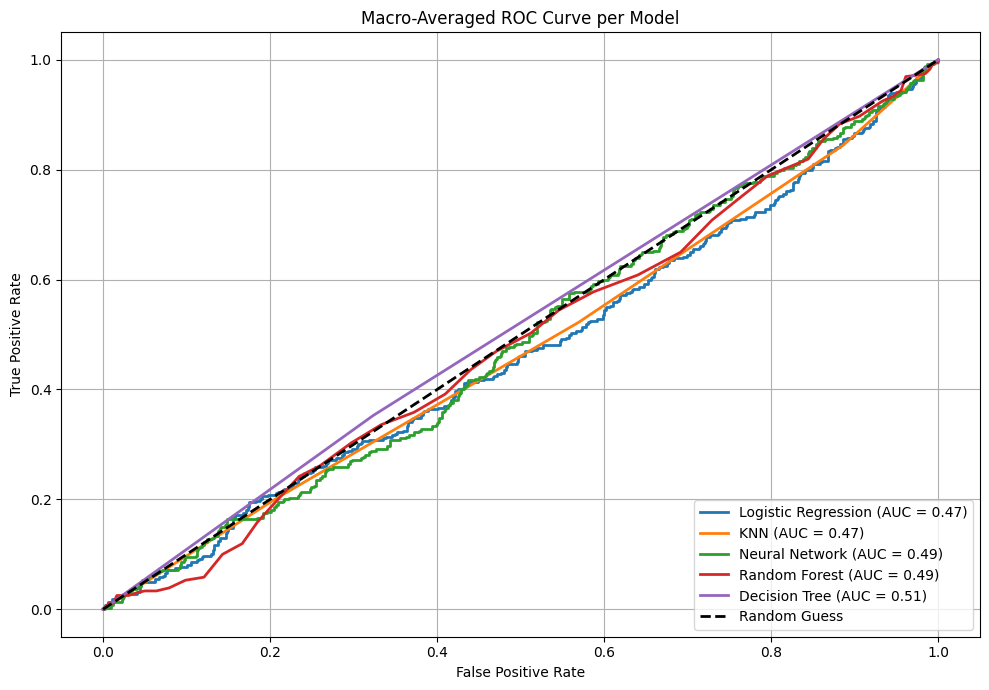

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Binarize target
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(10, 7))

for name, mdl in models.items():
    try:
        if name == 'Neural Network':
            y_score = mdl.predict(X_test_data)
        else:
            if hasattr(mdl, "predict_proba"):
                y_score = mdl.predict_proba(X_test_data)
            else:
                # Fallback to OneVsRestClassifier for models lacking predict_proba
                y_score = OneVsRestClassifier(mdl).fit(X_train_scaled, y_train).predict_proba(X_test_data)

        # Flatten all class predictions and true labels for macro ROC
        fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    except Exception as e:
        print(f"Skipped ROC for {name}: {e}")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.title('Macro-Averaged ROC Curve per Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
